# Mini Projet MDI220

*By Daniel Jorge Deutsch*

In [1]:
import ssl
import scipy as sp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats
from scipy import special

# Data Source Constants
LINK_NUCLEAR_POWER_ACCIDENTS = "https://innovwiki.ethz.ch/v1/images/NuclearPowerAccidents2016.csv"

# Exercise 1.1

In [2]:
# Avoids the "certificate verify failed" error when reading the csv
ssl._create_default_https_context = ssl._create_unverified_context

# Loads the dataframe
df = pd.read_csv(
    LINK_NUCLEAR_POWER_ACCIDENTS,                                                # Link in which the data is 
    header = 0,                                                                  # Ignores the first line (column names)
    names = ["date", "loc", "cost", "ines", "syth_mag", "reg", "desc", "fat"],   # Sets the name of each column
    keep_default_na = False,                                                     # Prevents pandas from considering the region NA as NaN
    na_values = [""],                                                            # Define only missing data as NaN
    parse_dates = ["date"]                                                       # Parse the date column into datetime
)

# Obtains the date of the Three Mile Island accident
tmi_date = df[df["desc"].str.contains("Three Mile Island")].iloc[0]["date"]

# Selects only the accidents that occured before the Three Mile Island accident
df = df[df["date"] < tmi_date]

# Drop all lines that have NaN in the cost column
df = df[df["cost"].notna()]

# Obtains the array cost
costs = df["cost"].to_numpy()

# Prints the size of the costs array
print(f"The costs array has {len(costs)} elements.")

The costs array has 55 elements.


# Exercise 1.2.a

Soit $ X \sim \mathcal{N}\left(\mu, \sigma \right) $ et $ Z \sim \mathcal{N}\left(0, 1 \right) $ deux variables aléatoires telles que $ X = \mu + \sigma Z $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \mu, \sigma^2 \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2\right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{aligned}

<br>

Si on calcule $ \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right)\right) $, on a:

<br>

\begin{aligned}
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \quad & = \quad P\left(X < \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \\
    & = \quad P\left(\frac{X-\mu}{\sigma} < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad p
\end{aligned}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad = \quad \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right)
\end{aligned}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{aligned}
    \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) \quad & = \quad \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right) \\
    & = \quad \mu + \sqrt{\sigma^2} \mathcal{F}^{-1}\left(p; 0, 1\right)
\end{aligned}

# Exercise 1.2.b

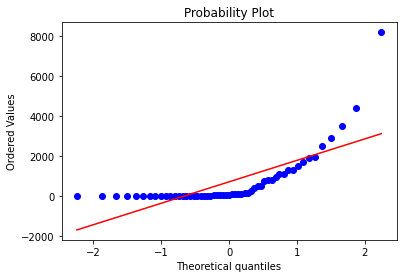

In [3]:
# Plots the QQ-plot using the normal law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.norm, plot=plt)

# Exercise 1.3.a 

Soit $ X \sim \mathcal{E}\left(\lambda \right) $ et $ Z \sim \mathcal{E}\left(1 \right) $ deux variables aléatoires telles que $ Z = \lambda X $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \lambda \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \lambda \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{aligned}

<br>

Si on calcule $ \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) $, on a:

<br>

\begin{aligned}
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \quad & = \quad P\left(X < \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(\lambda X < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad p
\end{aligned}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right)
\end{aligned}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{aligned}
    \mathcal{F}^{-1}\left(p; \lambda \right) \quad = \quad \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)
\end{aligned}

# Exercise 1.3.b

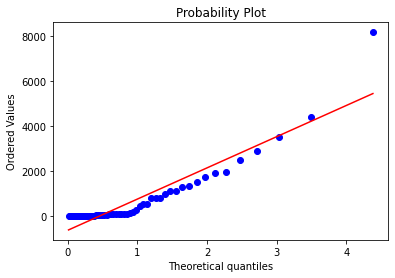

In [4]:
# Plots the QQ-plot using the exponential law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.expon, plot=plt)

# Exercise 1.4

En regardant les graphiques des quantiles obtenus dans les exercises 1.2.b et 1.3.b, nous pouvons nous convaincre que l’approche exponentielle est plus acceptable comme loi de probabilité que la loi normale car ses couts sont plus proches de la droite sur le Q-Q plot.

# Exercise 2.1

In [5]:
λn_hat = len(costs)/np.sum(costs)
print(f"λn_hat: {λn_hat}")

λn_hat: 0.0013767725947156965


# Exercise 2.2

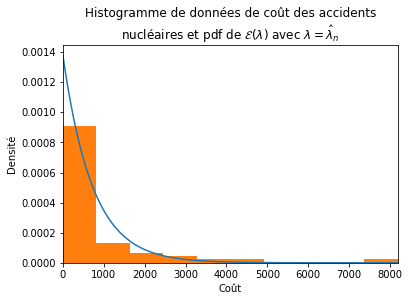

In [6]:
# Obtains the pdf
x = np.linspace(0, np.max(costs), int(np.max(costs)))   # Costs of the accidents
fX = λn_hat*np.e**(-λn_hat*x)                            # Probability Density Function

# Plot
plt.plot(x, fX)
plt.title(r"Histogramme de données de coût des accidents" + "\n" + r"nucléaires et pdf de $\mathcal{E}(\lambda)$ avec $\lambda = \hat{\lambda}_n$")
plt.xlabel("Coût")
plt.ylabel("Densité")
plt.xlim(x[0], x[-1])
n, bins, patches = plt.hist(costs, density=True)

# Exercise 2.3

D'abord on calcule l'esperance de $T_1\left(X\right)$:

<br>

\begin{aligned}
    E\left[T_1\left(X\right)\right] \quad & = \quad E\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right] \\
    & = \quad \frac{1}{n}\sum_{i=1}^{n}E\left[X_i\right] \\
    & = \quad \frac{1}{n}\frac{n}{\lambda} \\
    & = \quad \frac{1}{\lambda} \\
    & = \quad g_1\left(\lambda\right) \quad \therefore \ T_1\left(X\right) \ \text{est un estimateur non biaisé}
\end{aligned}

<br>

Maintenant on calcule la variance de $T_1\left(X\right)$:

<br>

\begin{aligned}
    Var\left[T_1\left(X\right)\right] \quad & = \quad Var\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right] \\
    & = \quad \frac{1}{n^2}\sum_{i=1}^{n}Var\left[X_i\right] \\
    & = \quad \frac{1}{n^2}\frac{n}{\lambda^2} \\
    & = \quad \frac{1}{n \lambda^2}  \quad \therefore \ \lim\limits_{n \rightarrow \infty} Var\left[T_1\left(X\right)\right] \ = \ 0
\end{aligned}

<br>

# FALTA ALGUMA AQUI

Donc $T_1\left(X\right)$ est un estimateur efficace pour $g_1\left(\lambda\right)$.

# Exercise 2.4

In [7]:
T1 = np.sum(costs)/len(costs)
g1 = T1
print(f"g1: {g1}")

g1: 726.3363636363637


# Exercise 2.5

On commence par calculer les biais $b\left(\lambda, T_1\left(X\right)\right)$ et $b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$ de $T_1\left(X\right)$ et $\tilde{T}_{1, \eta}\left(X\right)$, respectivement:

<br>

\begin{aligned}
        b\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[T_1\left(X\right) - g_1\left(\lambda\right)\right]
        &&&
        b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right) - g_1\left(\lambda\right)\right]
    \\
        & = \quad E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad g_1\left(\lambda\right) - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\eta \ T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad 0 \quad \text{comme prévu, une fois que } T_1\left(X\right) \text{est non biaisé}
        &&&
        & = \quad \eta \ E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad \eta \ g_1\left(\lambda\right) - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad g_1\left(\lambda\right) \ \left(1 - \eta\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda} \ \left(1 - \eta\right)
\end{aligned}

<br>

Maintenant, on peut calculer les risques quadratiques $R\left(\lambda, T_1\left(X\right)\right)$ et $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$:

<br>

\begin{aligned}
        R\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[\left(T_1\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
        &&&
        R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\left(\tilde{T}_{1, \eta}\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
    \\
        & = \quad \underbrace{b\left(\lambda, T_1\left(X\right)\right)^2}_{\text{= 0}} + Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)^2 + Var\left(\tilde{T}_{1, \eta}\left(X\right)\right)
    \\
        & = \quad Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad \left(\frac{1}{\lambda} \ \left(1 - \eta\right)\right)^2 + Var\left(\eta \ T_1\left(X\right)\right)
    \\
        & = \quad \frac{1}{n\lambda^2}
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ Var\left(T_1\left(X\right)\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ \frac{1}{n \ \lambda^2}
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right)
\end{aligned}

<br>

Alors, on a:

<br>

\begin{aligned}
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & < \quad R\left(\lambda, T_1\left(X\right)\right) \\
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) - R\left(\lambda, T_1\left(X\right)\right) \quad & < \quad 0 \\
    \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right) - \frac{1}{n\lambda^2} \quad & < \quad 0 \\
    \frac{\left(\eta - 1\right)^2}{\lambda^2} + \frac{\eta^2 - 1}{n\lambda^2} \quad & < \quad 0 \\
    \left(\eta - 1\right)^2 + \frac{\eta^2 - 1}{n} \quad & < \quad 0 & \left(\forall\lambda > 0 \right) \\
    \left(\eta - 1\right) \left(\eta - 1 + \frac{\eta + 1}{n}\right) \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\frac{\left(n + 1\right) \eta + \left(1 - n\right)}{n}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\left(n + 1\right) \eta + \left(1 - n\right)\right] \quad & < \quad 0 & \left(n > 0\right) \\
    \left(\eta - 1\right) \left[\eta + \frac{1 - n}{n + 1}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\eta - \frac{n - 1}{n + 1}\right] \quad & < \quad 0
\end{aligned}

<br>

Ce qui ne sera vrai que dans les situations suivantes:

<br>

\begin{aligned}
    \left(i\right)
    \begin{cases}
        \eta - 1 \quad & < \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & > \quad 0
    \end{cases}
    &&&&
    et
    &&&&
    \left(ii\right)
    \begin{cases}
        \eta - 1 \quad & > \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & < \quad 0
    \end{cases}
\end{aligned}

<br>

On a donc que seule la valeur $\eta \in \left]\frac{n-1}{n+1}, \ 1\right[$ satisfait le système $\left(i\right)$ et que $\nexists \ \eta \in \mathbb{R}$ qui satisfait le système $\left(ii\right)$. Donc, comme nous voulons joindre les intervalles obtenus pour $\eta$ dans les systèmes $\left(i\right)$ et $\left(ii\right)$, l'intervalle de valeurs de $\eta$ dans lequel $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) < R\left(\lambda, T_1\left(X\right)\right)$ est:

<br>

\begin{aligned}
    \eta \in \left]\frac{n-1}{n+1}, \ 1\right[
\end{aligned}

<br>

**Il est à noter que ce résultat ne contredit pas la question précédente car $\tilde{T}_{1, \eta}\left(X\right)$ est biaisé.**

# Exercise 2.6

Soit $g_2\left(\lambda\right)$ la médiane de la variable aléatoire $ X \sim \mathcal{E}\left(\lambda \right) $, on a par définition:

<br>

\begin{aligned}
    \int_{0}^{g_2\left(\lambda\right)}f_X\left(x\right) dx \quad & = \quad \frac{1}{2} \\
    \int_{0}^{g_2\left(\lambda\right)}\lambda e^{-\lambda x} dx \quad & = \quad \frac{1}{2} \\
    \lambda \left(\frac{-e^{-\lambda x}}{\lambda}\right)_{0}^{g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    \left(-e^{-\lambda x}\right)_{0}^{g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    1 - e^{-\lambda g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    e^{-\lambda g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    -\lambda g_2\left(\lambda\right) \quad & = \quad ln\left(\frac{1}{2}\right) \\
    -\lambda g_2\left(\lambda\right) \quad & = \quad -ln\left(2\right) \\
    g_2\left(\lambda\right) \quad & = \quad \frac{ln\left(2\right)}{\lambda} 
\end{aligned}

<br>

Ainsi, puisque $\tilde{T}_{1, \eta}\left(X\right)$ est un estimateur sans biais de la médiane, on a:

<br>

\begin{aligned}
    b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right) - g_2\left(\lambda\right)\right] \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right)\right] - g_2\left(\lambda\right) \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right)\right] \quad & = \quad g_2\left(\lambda\right) \\
    \eta \ E\left[T_1\left(X\right)\right] \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \ g_1\left(\lambda\right) \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \ \frac{1}{\lambda} \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \quad & = \quad ln\left(2\right) 
\end{aligned}

In [8]:
# Obtains the empirical median
emp_median = np.median(costs)

# Obtains the estimated median
η = np.log(2)
est_median = η*T1

print(f"Empirical median: {emp_median}")
print(f"Estimated median: {est_median}")

Empirical median: 89.9
Estimated median: 503.4580025927086


# Exercise 2.7

À partir du graphique ci-dessous, on peut clairement voir que pour des valeurs inférieures de n, le risque quadratique de $\tilde{T}_{1, \eta}\left(X\right)$ est inférieur à celui de $\tilde{T}_1\left(X\right)$. Pour des valeurs plus élevées, cependant, le contraire est noté.

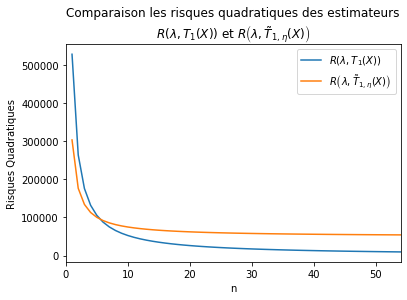

In [9]:
# Obtains the n axis
n = np.linspace(0, len(costs)-1, len(costs))

# Obtains the quadratic risks by the formulas in 2.5
RT1 = 1/(n*λn_hat**2)
RT1η = (1/λn_hat**2)*((η-1)**2 + (η**2/n))

# Plot
plt.plot(n, RT1)
plt.plot(n, RT1η)
plt.title(r"Comparaison les risques quadratiques des estimateurs" + "\n" + r"$R\left(\lambda, T_1\left(X\right)\right)$ et $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$")
plt.legend([r"$R\left(\lambda, T_1\left(X\right)\right)$", r"$R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$"])
plt.xlabel("n")
plt.ylabel("Risques Quadratiques")
plt.xlim(n[0], n[-1])
plt.show()

# Exercise 3.1

Considerando que as variáveis aleatórias $X_j \sim \mathcal{E}\left(\lambda \right)$, $j = 1, 2, ..., n$ são $iid$ (Independent Identically Distributed), temos que a função característica de $Y = \sum_{j=1}^{n} X_i$ é dada por:

<br>

\begin{aligned}
    \mathcal{\phi}_{Y}\left(t\right) \quad & = \quad \prod_{j=1}^{n} \mathcal{\phi}_{X_j}\left(t\right) \\
    & = \quad \prod_{j=1}^{n} \frac{1}{1 - \frac{it}{\lambda}} \\
    & = \quad \frac{1}{\left(1 - \frac{it}{\lambda}\right)^n} \\
\end{aligned}

<br>

Percebemos, então, que a função carracterística da variável aleatória $Y$ é igual a função característica de uma variável que segue a lei $Gamma\left(k, \theta\right)$ com $k = n$ e $\theta = \frac{1}{\lambda}$. Assim, podemos dizer que $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$.

Queremos, então, verificar se o custo medio de um acidente é menor que 1 bilhao de dolares, ou seja, se $\frac{1}{n} \ E\left[Y\right] \leq 10^3$ (note que é $10^3$ e não $10^9$ pois os custos $X_j$ estão expressos em milhões de dólares). Assim:

<br>

\begin{aligned}
    \frac{1}{n} \ E\left[Y\right] \quad & \leq \quad 10^3 \\
    E\left[Y\right] \quad & \leq \quad n \ 10^3 \\
    E\left[\sum_{j=1}^{n}X_j\right] \quad & \leq \quad n \ 10^3 \\
    \sum_{j=1}^{n}E\left[X_j\right] \quad & \leq \quad n \ 10^3 \\
    n \ \frac{1}{\lambda} \quad & \leq \quad n \ 10^3 \\
    \lambda \quad & \geq \quad 10^{-3}
\end{aligned}

<br>

Assim, podemos formular nossa hipotese nula $H_0$ como sendo o custo medio de um acidente é igual a 1 bilhao de dolares e nossa hipotese $H_1$ como sendo o custo medio menor que 1 bilhao de dolares. Tais hipóteses podem ser traduzidas para a notação matemática como:

<br>

\begin{aligned}
    H_0: \quad \lambda \quad = \quad 10^{-3} \\
    H_1: \quad \lambda \quad > \quad 10^{-3} 
\end{aligned}

# Exercise 3.2

Uma vez que $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$, a função densidade de probabilidade de $Y$ é dada por $f_Y\left(y\right) = \frac{\lambda^n \ y^{n-1} \ e^{-\lambda y}}{\Gamma\left(n\right)}$. Assim, o teste do rapport de vraisemblance de l’hypothèse $H_0$ vs $H_1$ au niveau $\alpha$ é dado por: 

<br>

\begin{aligned}
    \frac{L\left(\lambda_0, Y\right)}{L\left(\lambda_1, Y\right)} \quad & < \quad k_\alpha \\
    \frac{\frac{\lambda_0^n \ y^{n-1} \ e^{-\lambda_0 y}}{\Gamma\left(n\right)}}{\frac{\lambda_1^n \ y^{n-1} \ e^{-\lambda_1 y}}{\Gamma\left(n\right)}} \quad & < \quad k_\alpha \\
    \frac{\lambda_0^n \ e^{-\lambda_0 y}}{\lambda_1^n \ e^{-\lambda_1 y}} \quad & < \quad k_\alpha\\
    \left(\frac{\lambda_0}{\lambda_1}\right)^n \ e^{-y\left(\lambda_0 - \lambda_1\right)} \quad & < \quad k_\alpha
\end{aligned}

<br>

Segundo o teorema de Neyman-Pearson, o test du rapport de vraisemblance é o mais poderoso qualquer que seja a escolha de $\alpha \in \left(0; \ 1\right)$.

# Exercise 3.3

Uma vez que o p-value obtido foi menor que $\alpha$, nos rejeitamos a hipótese $H_0$ e, portanto, afirmamos que o preço médio de um acidente é menor que 1 bilhao de dolares.

In [10]:
# Defines the constants
α = 5E-2
λ0 = 1E-3

# Obtains the p-value
p = sp.stats.gamma.cdf(x=np.sum(costs), a=len(costs), scale=1/λ0)

print(f"p-value: {p}")

p-value: 0.013717486423264914


# Exercise 3.4

O gráfico apresentado abaixo mostra em azul a curva da função densidade de probabilidade de $Y$ e em verde a região na qual a hipótese $H_0$ é rejeitada.

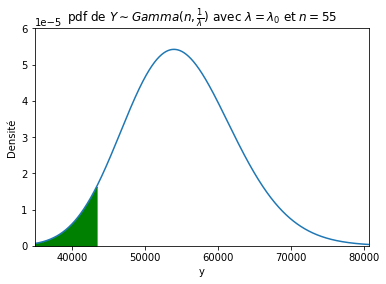

In [12]:
# Obtains the pdf
y = np.linspace(sp.stats.gamma.ppf(q=0.001, a=len(costs), scale=1/λ0), sp.stats.gamma.ppf(q=0.999, a=len(costs), scale=1/λ0), 1000)
fY = sp.stats.gamma.pdf(x=y, a=len(costs), scale=1/λ0)

# Obtains the rejected region
y_rej_max = sp.stats.gamma.ppf(q=α, a=len(costs), scale=1/λ0)
y_rej = y[y < y_rej_max]
fY_rej = fY[:len(y_rej)]

# Plot
plt.plot(y, fY)
plt.fill_between(y_rej, 0, fY_rej, color="green")
plt.title(r"pdf de $Y \sim Gamma(n, \frac{1}{\lambda})$ avec $\lambda = \lambda_0$ et $n =$" + str(len(costs)))
plt.xlabel("y")
plt.ylabel("Densité")
plt.ylim(0, 6E-5)
plt.xlim(y[0], y[-1])
plt.show()

# Exercise 3.5

Por meio do gráfico plotado abaixo, nós podemos concluir que quanto maior o número de amostras mais claro fica o limite entre aceitar e rejeitar a hipótese $H_0$.

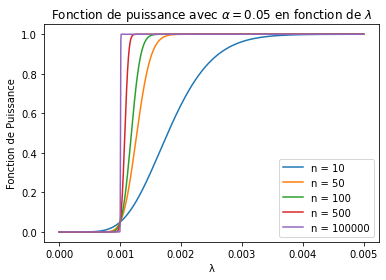

In [27]:
# Defines the sample sizes and λ arrays
sample_sizes = [10, 50, 100, 500, 100000]
λ = np.linspace(0, 5*λ0, 1000)

# Plots the power function for every n in sample_sizes
for n in sample_sizes:
    limit = sp.stats.gamma.ppf(q=α, a=n, scale=1/λ0)
    power_fcn = sp.stats.gamma.cdf(x=limit, a=n, scale=1/λ)
    plt.plot(λ, power_fcn)

# Adds some details to the plot
plt.title(r"Fonction de puissance avec $\alpha = 0.05$ en fonction de $\lambda$")
plt.legend([f"n = {n}" for n in sample_sizes])
plt.xlabel("λ")
plt.ylabel("Fonction de Puissance")
plt.show()

# Exercise 3.6

# References

[http://www.portalaction.com.br/inferencia/341-metodos-numericos-dos-estimadores-de-maxima-verossimilhanca][1]

[http://ressources.unisciel.fr/ramses/519-21_probabilites/co/fa901_5_5.html][2]

[http://www.de.ufpb.br/~tarciana/Probabilidade2/Aula9.pdf][3]